In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [66]:
df = pd.read_csv('PersonalData.csv', index_col=0)

df_num = df.select_dtypes(include=[np.number])

A = df_num.loc['A'].values
B = df_num.loc['B'].values

d_euklid = np.sqrt(np.sum((A - B)**2))
print(f"\nOdleglosc euklidesowa: {d_euklid:.4f}")

df_scaled = df_num.copy()
df_scaled['Zarobki (tys.)'] = df_scaled['Zarobki (tys.)'] * 1000
A_sc = df_scaled.loc['A'].values
B_sc = df_scaled.loc['B'].values
d_scaled = np.sqrt(np.sum((A_sc - B_sc)**2))
print(f"Po zmianie skali zarobkow (tys->zl): {d_scaled:.4f}")
print("Wniosek: atrybut o duzych wartosciach dominuje w obliczeniach")

df_std = df_num / df_num.std()
A_std = df_std.loc['A'].values
B_std = df_std.loc['B'].values
d_std = np.sqrt(np.sum((A_std - B_std)**2))
print(f"Po standaryzacji: {d_std:.4f}")

d_manhattan = np.sum(np.abs(A - B))
print(f"\nOdleglosc Manhattan: {d_manhattan:.4f}")

p = 3
d_minkowski = np.sum(np.abs(A - B)**p)**(1/p)
print(f"Odleglosc Minkowskiego: {d_minkowski:.4f}")


Odleglosc euklidesowa: 30.6046
Po zmianie skali zarobkow (tys->zl): 800.5848
Wniosek: atrybut o duzych wartosciach dominuje w obliczeniach
Po standaryzacji: 4.0000

Odleglosc Manhattan: 68.8000
Odleglosc Minkowskiego: 24.5246


## Zadanie 2

Napisz program pozwalający obliczać podobieństwo między sekwencjami DNA traktowanymi jako ciągi znaków.

Zaimplementować na podstawie metryki
$$
D(x, y) = |x| + |y| - 2|LCS(x,y)|
$$

gdzie LCS oznacza najdłuszą wspólna podsekwencję (ang.
longest common subsequence)
  
  (LCS(x,y) = bcde). D(x, y) = 3

In [62]:
x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y)) # Oczekiwany wynik 3

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y)) # Oczekiwany wynik 5

3
5


In [63]:
def lcs_length(x, y):
    m, n = len(x), len(y)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i-1] == y[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return dp[m][n]

def get_D_x_y(x, y):
    return len(x) + len(y) - 2 * lcs_length(x, y)

x = "abcde"
y = "bcdxye"
print(get_D_x_y(x, y))

X = "AGGTAB"
Y = "GXTXAYB"
print(get_D_x_y(X, Y))

3
5


## Zadanie 3

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [67]:
film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta ksiezyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"
film4 = "rakieta mars astronauta czerwona planeta"

vectorizer = CountVectorizer()
X = vectorizer.fit_transform([film1, film2, film3])
print("Wektory:", X.toarray())

cos_sim = cosine_similarity(X)
print("Podobienstwo cosinusowe:")
print(f"film1-film2: {cos_sim[0,1]:.4f}")
print(f"film1-film3: {cos_sim[0,2]:.4f}")
print(f"film2-film3: {cos_sim[1,2]:.4f}")
print("Najbardziej podobne: film1 i film2")
print("Najmniej podobne: film1-film3, film2-film3")

X_all = vectorizer.fit_transform([film1, film2, film3, film4])
cos_all = cosine_similarity(X_all)
print(f"film4 najbardziej podobny do film2: {cos_all[3,1]:.4f}")

Wektory: [[1 1 0 0 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 1]]
Podobienstwo cosinusowe:
film1-film2: 0.4000
film1-film3: 0.0000
film2-film3: 0.0000
Najbardziej podobne: film1 i film2
Najmniej podobne: film1-film3, film2-film3
film4 najbardziej podobny do film2: 0.4000


## Zadanie 4

A. Wczytaj dane z pliku **k_means_data.csv.**

B. Zastosuj **algorytm hierarchiczny aglomeracyjny** i wyszukaj w zbiorze danych klastry.

C. Zastosuj **algorytm k-średnich** i wyszukaj w zbiorze danych klastry.

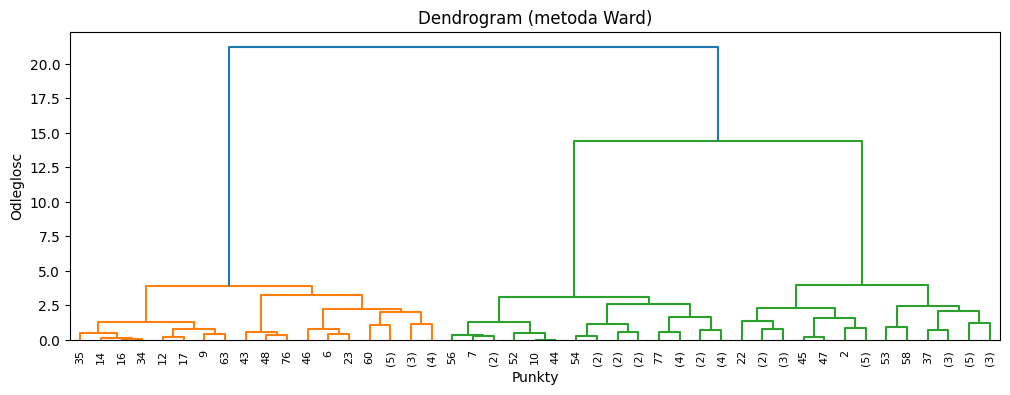

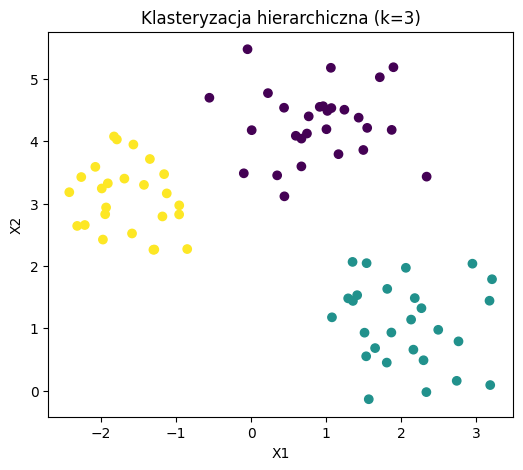

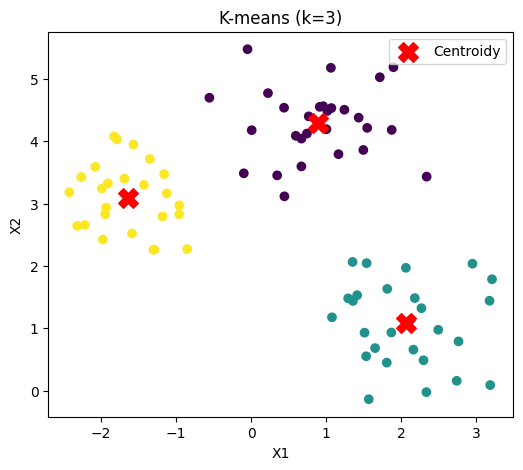

In [51]:
df_kmeans = pd.read_csv('k_means_data.csv', comment='#', header=None, names=['X1', 'X2'])

data = df_kmeans[['X1', 'X2']].values

Z = linkage(data, method='ward')
plt.figure(figsize=(12, 4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram (metoda Ward)')
plt.xlabel('Punkty')
plt.ylabel('Odleglosc')
plt.show()

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_labels = hc.fit_predict(data)
plt.figure(figsize=(6, 5))
plt.scatter(data[:, 0], data[:, 1], c=hc_labels, cmap='viridis')
plt.title('Klasteryzacja hierarchiczna (k=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

km = KMeans(n_clusters=3, random_state=42, n_init=10)
km_labels = km.fit_predict(data)
plt.figure(figsize=(6, 5))
plt.scatter(data[:, 0], data[:, 1], c=km_labels, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroidy')
plt.title('K-means (k=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Zadanie 5

Zaimplementuj samodzielnie **algorytm k-średnich** dla danych z pliku **k_means_data.csv**.

Zbieznosc po 6 iteracjach


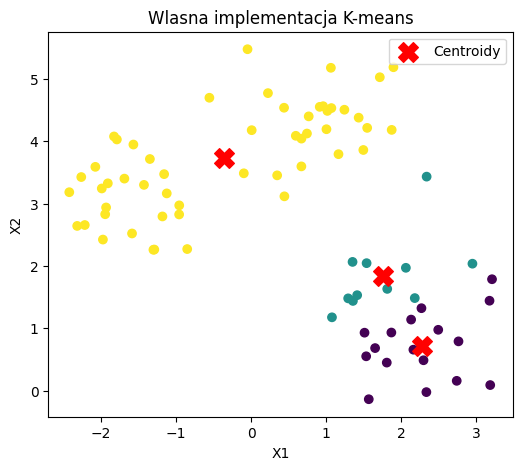

In [52]:
def kmeans_custom(X, k, max_iter=100):
    np.random.seed(42)
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx].copy()

    for iteration in range(max_iter):
        distances = np.array([[np.sqrt(np.sum((x - c)**2)) for c in centroids] for x in X])
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.sum(labels == i) > 0
                                  else centroids[i] for i in range(k)])
        if np.allclose(centroids, new_centroids):
            print(f"Zbieznosc po {iteration+1} iteracjach")
            break
        centroids = new_centroids

    return labels, centroids

labels_custom, centroids_custom = kmeans_custom(data, 3)

plt.figure(figsize=(6, 5))
plt.scatter(data[:, 0], data[:, 1], c=labels_custom, cmap='viridis')
plt.scatter(centroids_custom[:, 0], centroids_custom[:, 1],
            c='red', marker='X', s=200, label='Centroidy')
plt.title('Wlasna implementacja K-means')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


## Zadanie 6

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

In [53]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

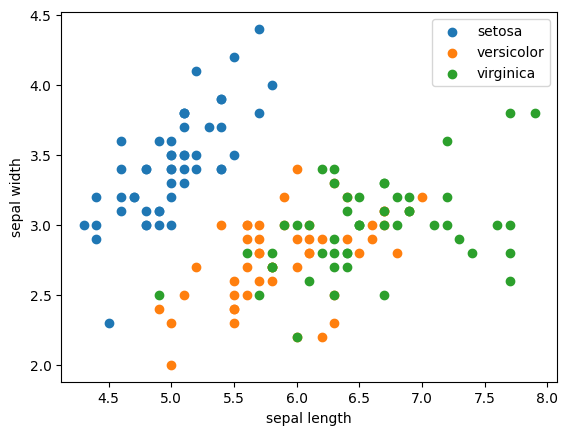

Min: [4.3 2.  1.  0.1]
Max: [7.9 4.4 6.9 2.5]
Std: [0.82806613 0.43586628 1.76529823 0.76223767]
Korelacje:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


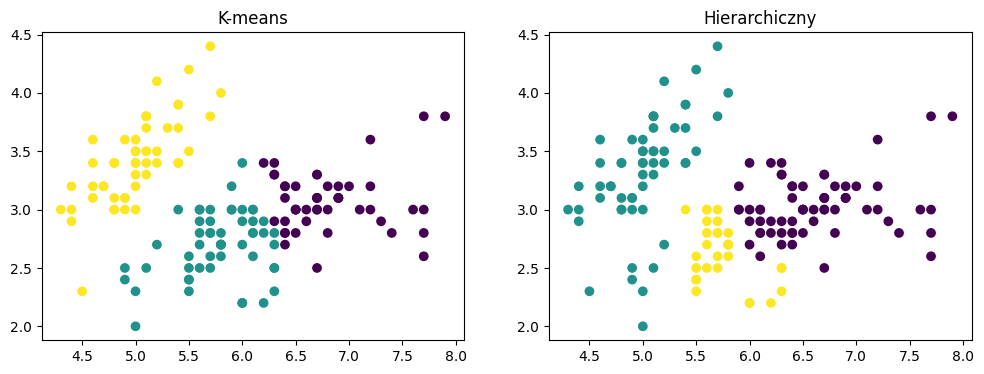

In [54]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

for i in range(3):
    mask = df_iris['target'] == i
    plt.scatter(df_iris.loc[mask, 'sepal length (cm)'], df_iris.loc[mask, 'sepal width (cm)'], label=iris.target_names[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

print("Min:", df_iris.iloc[:,:4].min().values)
print("Max:", df_iris.iloc[:,:4].max().values)
print("Std:", df_iris.iloc[:,:4].std().values)
print("Korelacje:")
print(df_iris.iloc[:,:4].corr())

X_sepal = df_iris[['sepal length (cm)', 'sepal width (cm)']].values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(X_sepal[:, 0], X_sepal[:, 1], c=KMeans(3, random_state=42, n_init=10).fit_predict(X_sepal))
ax1.set_title('K-means')
ax2.scatter(X_sepal[:, 0], X_sepal[:, 1], c=AgglomerativeClustering(3).fit_predict(X_sepal))
ax2.set_title('Hierarchiczny')
plt.show()

## Zadanie 7
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

In [55]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [56]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [57]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak


Informacje o zbiorze:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Brakujace wartosci: 19
Rozmiar po usunieciu brakow: 333


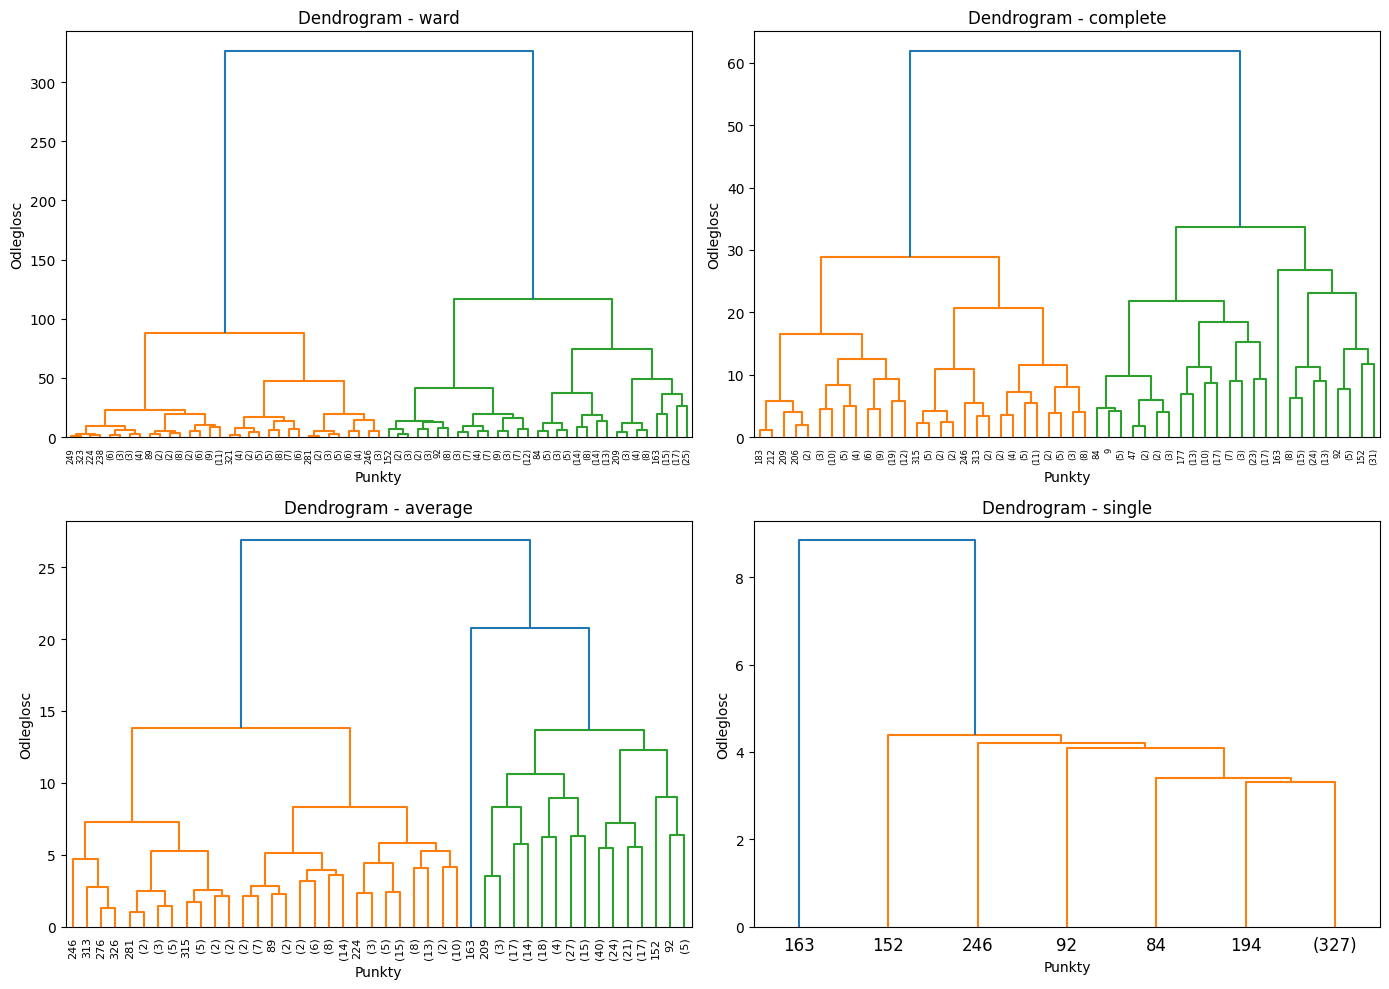

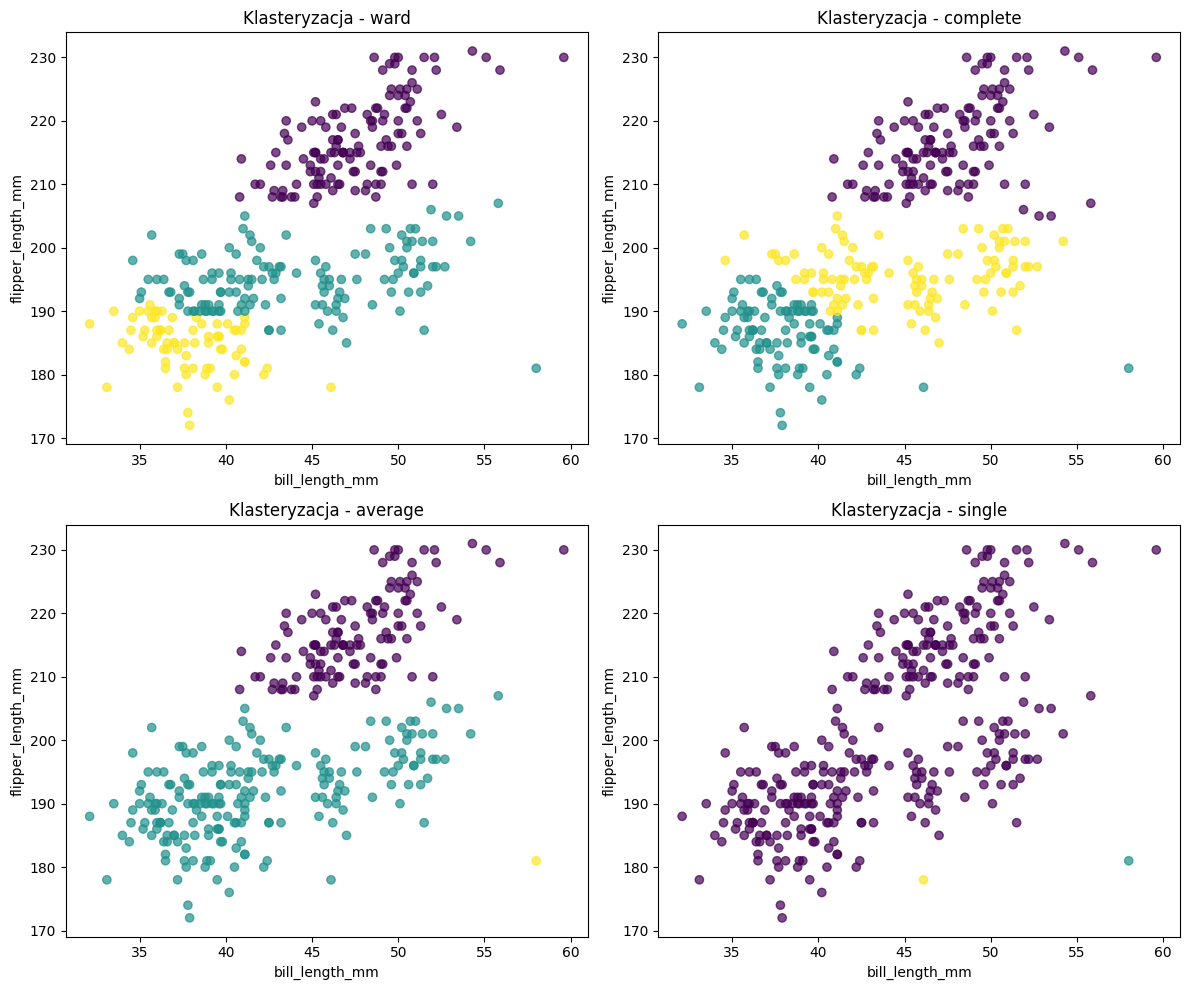

In [68]:
df_penguins = pd.read_csv('penguins.csv')
print("Informacje o zbiorze:")
print(df_penguins.info())
print(f"\nBrakujace wartosci: {df_penguins.isnull().sum().sum()}")

df_penguins = df_penguins.dropna()
print(f"Rozmiar po usunieciu brakow: {len(df_penguins)}")

X_peng = df_penguins[['bill_length_mm', 'flipper_length_mm']].values

methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, method in zip(axes.flat, methods):
    Z = linkage(X_peng, method=method)
    dendrogram(Z, ax=ax, truncate_mode='level', p=5)
    ax.set_title(f'Dendrogram - {method}')
    ax.set_xlabel('Punkty')
    ax.set_ylabel('Odleglosc')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, method in zip(axes.flat, methods):
    hc = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = hc.fit_predict(X_peng)
    ax.scatter(X_peng[:, 0], X_peng[:, 1], c=labels, cmap='viridis', alpha=0.7)
    ax.set_title(f'Klasteryzacja - {method}')
    ax.set_xlabel('bill_length_mm')
    ax.set_ylabel('flipper_length_mm')
plt.tight_layout()
plt.show()
